In [128]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
import random
import pickle
import pandas as pd

In [129]:
np.random.seed(0)

In [130]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)

with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)

with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

print(type(train_data))

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [131]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [132]:
assert(X_train.shape[0] == y_train.shape[0])

In [133]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

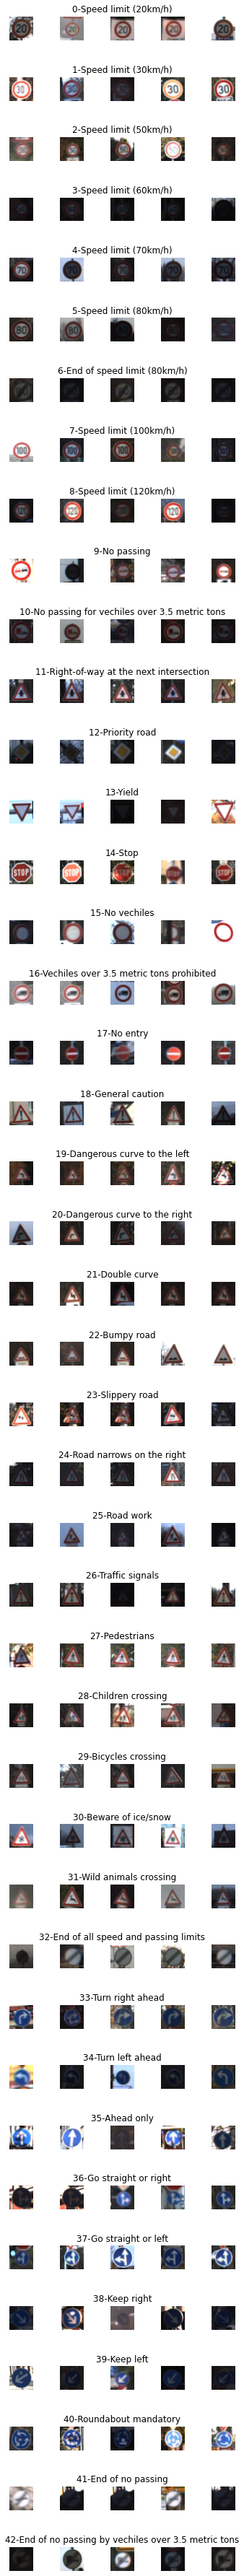

In [134]:
num_of_samples = []

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + '-' + row['SignName'])
            num_of_samples.append(len(x_selected))

    # (index, Series)

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

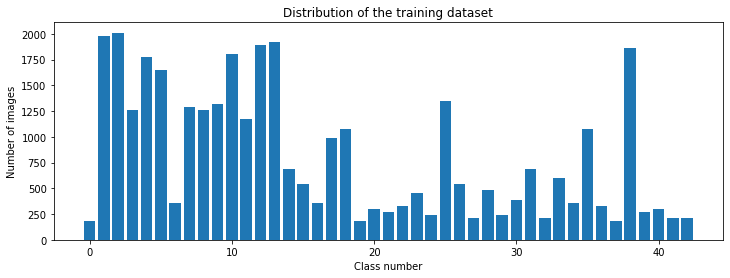

In [135]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


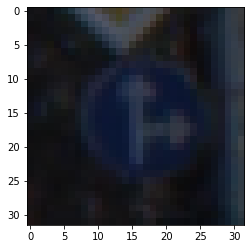

In [136]:
import cv2

plt.imshow(X_train[1000])
# plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


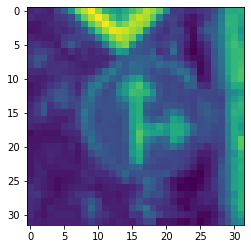

In [137]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[1000])
plt.imshow(img)
print(img.shape)


(32, 32)


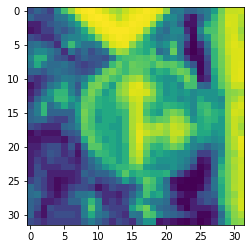

In [138]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img
img = equalize(img)
plt.imshow(img)
print(img.shape)

In [139]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


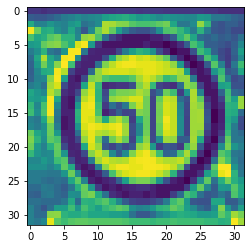

In [140]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
print(X_train.shape)

In [141]:
X_train = X_train.reshape(34799,32,32, 1)
X_val = X_val.reshape(4410,32,32, 1)
X_test = X_test.reshape(12630,32,32, 1)

In [142]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                height_shift_range=0.1,
                zoom_range=0.2,
                shear_range=0.1,
                rotation_range=10)
datagen.fit(X_train)

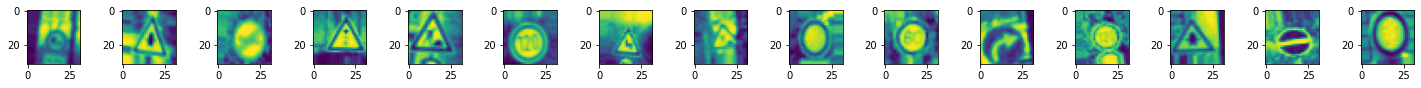

In [143]:
batches = datagen.flow(X_train, y_train, batch_size=32)
x_batch, y_batch = next(batches)

fig, axis = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axis[i].imshow(x_batch[i].reshape(32,32))
    

In [144]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [145]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [146]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(60,(5,5), input_shape=(32,32,1), activation='relu'))
    model.add(Conv2D(60,(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))

    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [147]:
model = leNet_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 4, 30)         

In [148]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=50), batch_size=500, epochs=10, validation_data=(X_val,y_val),shuffle=1,verbose=1)

Epoch 1/10
600/600 [==============================] - 12s 20ms/step - loss: 2.3410 - accuracy: 0.3347 - val_loss: 0.7240 - val_accuracy: 0.7921
Epoch 2/10
600/600 [==============================] - 12s 20ms/step - loss: 0.9934 - accuracy: 0.6887 - val_loss: 0.2523 - val_accuracy: 0.9281
Epoch 3/10
600/600 [==============================] - 12s 19ms/step - loss: 0.6491 - accuracy: 0.7966 - val_loss: 0.1478 - val_accuracy: 0.9565
Epoch 4/10
600/600 [==============================] - 12s 19ms/step - loss: 0.5141 - accuracy: 0.8361 - val_loss: 0.1316 - val_accuracy: 0.9599
Epoch 5/10
600/600 [==============================] - 11s 19ms/step - loss: 0.4386 - accuracy: 0.8626 - val_loss: 0.1222 - val_accuracy: 0.9633
Epoch 6/10
600/600 [==============================] - 11s 19ms/step - loss: 0.3685 - accuracy: 0.8837 - val_loss: 0.0714 - val_accuracy: 0.9785
Epoch 7/10
600/600 [==============================] - 11s 19ms/step - loss: 0.3282 - accuracy: 0.8955 - val_loss: 0.0596 - val_accuracy:

Text(0.5, 0, 'epoch')

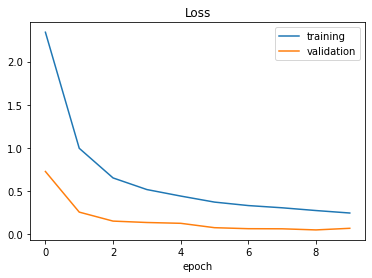

In [149]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

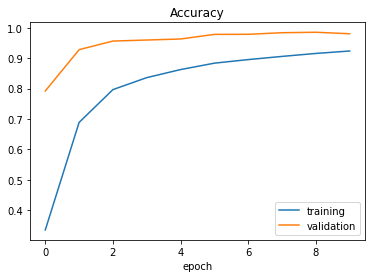

In [150]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [151]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score', score[0])
print('Test Score', score[1])

Test Score 0.16951915621757507
Test Score 0.949802041053772


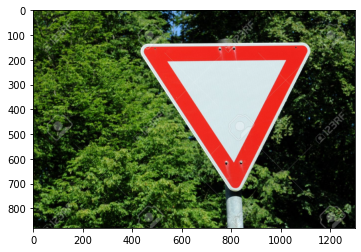

In [152]:
#fetch image

import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


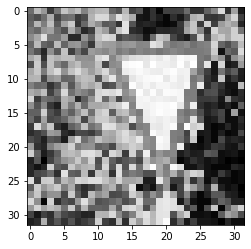

In [153]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [154]:
img = img.reshape(1, 32, 32, 1)

In [155]:
print("predicted sign: "+ str(np.argmax(model.predict(img), axis=-1)))

predicted sign: [13]
